<a href="https://colab.research.google.com/github/marcelaalins/Python/blob/main/C%C3%B3pia_de_PythonEstudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import seaborn as sns
import matplotlib.pyplot as plt
sc = SparkSession.builder.master('local[*]').getOrCreate()

In [ ]:
df = pd.read_csv('/content/shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.columns

#para ver o nome das minhas colunas e se a coluna que eu quero tirar não contém nenhum espaço em branco no nome dela

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
#vamos ver se temos IDs repetidos, porque se não houverem, essa coluna não se torna de interesse para a análise
duplicados = df['Customer ID'].duplicated()

registros_duplicados = df[duplicados]

#não retornou resultado, vou forçar o output

registros_duplicados

#não existem IDs duplicados de clientes
#Conclusão: não podemos analisar o histórico de compras de cada cliente, pois este não existe

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [ ]:
dados = df.drop("Customer ID", axis=1)

#é importante criar um novo dataframe se você dropar alguma coluna do original
#porque, caso você vá rodar o código novamente, você pode ter erro com a coluna, que vai ficar "inexistente" nesse trecho de código na célula
#pois ela dropou a coluna do df original.

In [ ]:
for coluna in dados.columns:
    valores_distintos = dados[coluna].unique()
    print(f"Valores distintos na coluna '{coluna}':\n{valores_distintos}\n")

#vendo os tipos de dados que temos dentro de cada coluna do dataframe para entender como podemos trabalhar com eles

Valores distintos na coluna 'Age':
[55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]

Valores distintos na coluna 'Gender':
['Male' 'Female']

Valores distintos na coluna 'Item Purchased':
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Valores distintos na coluna 'Category':
['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Valores distintos na coluna 'Purchase Amount (USD)':
[ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  32  95  41  47
  99  87  92  98  89  35  75  65  86  84  77  27  23  74  80  42  61  82
  78  93  50  57  66  44  52  71  

In [ ]:
valores_nulos = dados.isnull().sum()

for coluna, qtd_nulos in valores_nulos.items():
    if qtd_nulos > 0:
        print(f"Coluna '{coluna}' tem {qtd_nulos} valores nulos.")


#como não houveram ocorrências de valores nulos, meu código não deu nenhum output

#então eu preciso forçar um output printando a variável que eu defini para verificar os valores nulos

valores_nulos


Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [ ]:
#verificando o formato dos meus dados no meu dataframe
tipos_de_dados = dados.dtypes
tipos_de_dados

Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

Glossário do conjunto de dados (em colunas)
>ID do Cliente: Um identificador exclusivo atribuído a cada cliente individual, facilitando o rastreamento e a análise de seu comportamento de compra ao longo do tempo.

>Idade: A idade do cliente, fornecendo informações demográficas para segmentação e estratégias de marketing direcionadas.

>Género: A identificação do género do cliente, uma variável demográfica chave que influencia as preferências de produto e os padrões de compra.

>Item comprado: O produto ou item específico selecionado pelo cliente durante a transação.

>Categoria: A classificação ampla ou grupo ao qual pertence o item comprado (por exemplo, roupas, eletrônicos, mantimentos).

>Valor da compra (USD): O valor monetário da transação, indicado em dólares dos Estados Unidos (USD), indica o custo do(s) item(s) adquirido(s).

>Localização: A localização geográfica onde a compra foi feita, oferecendo insights sobre preferências regionais e tendências de mercado.

>Tamanho: A especificação de tamanho (se aplicável) do item adquirido, relevante para vestuário, calçados e determinados bens de consumo.

>Cor: A variante ou escolha de cor associada ao item adquirido, influenciando as preferências do cliente e a disponibilidade do produto.

>Temporada: A relevância sazonal do item comprado (por exemplo, primavera, verão, outono, inverno), impactando a gestão de estoque e as estratégias de marketing.

>Avaliação de revisão: avaliação numérica ou qualitativa fornecida pelo cliente em relação à sua satisfação com o item adquirido.

>Status da Assinatura : Indica se o cliente optou por um serviço de assinatura, oferecendo insights sobre seu nível de fidelidade e potencial de receita recorrente.

>Tipo de Envio: Especifica o método utilizado para entregar o item adquirido (por exemplo, envio padrão, entrega expressa), influenciando os prazos e custos de entrega.

>Desconto aplicado: indica se algum desconto promocional foi aplicado à compra, esclarecendo a sensibilidade ao preço e a eficácia da promoção.

>Código promocional utilizado: indica se um código promocional ou cupom foi utilizado durante a transação, auxiliando na avaliação do sucesso da campanha de marketing.

>Compras Anteriores: Fornece informações sobre a quantidade ou frequência de compras anteriores realizadas pelo cliente, contribuindo para estratégias de segmentação e retenção de clientes.

>Método de pagamento: especifica o modo de pagamento utilizado pelo cliente (por exemplo, cartão de crédito, dinheiro), oferecendo informações sobre as opções de pagamento preferidas.

>Frequência de compras: indica a frequência com que o cliente se envolve em atividades de compra, uma métrica crítica para avaliar a fidelidade do cliente e o valor vitalício.

In [ ]:
frequencia_idade = dados['Age'].value_counts().reset_index()

frequencia_idade.columns = ['Idade do Cliente', 'Frequência']

frequencia_idade

    Idade do Cliente  Frequência
0                 69          88
1                 57          87
2                 41          86
3                 25          85
4                 49          84
5                 50          83
6                 54          83
7                 27          83
8                 62          83
9                 32          82
10                19          81
11                58          81
12                42          80
13                43          79
14                28          79
15                31          79
16                37          77
17                46          76
18                29          76
19                68          75
20                59          75
21                63          75
22                56          74
23                36          74
24                55          73
25                52          73
26                64          73
27                35          72
28                51          72
29        

In [ ]:
#inserindo uma tabela temporária intervalar da idade dos meus clientes
#como a descrição dos dados sugere, esse pode ser um dado relevante para o direcionamento das campanhas de marketing de uma empresa

intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

dados['Faixa Etária'] = pd.cut(dados['Age'], bins=intervalos)
#bins é como se fosse o intervalo em que eu pretendo agrupar os meus dados/ é uma categoria onde posso definir limites

frequencia_faixa_etaria = dados['Faixa Etária'].value_counts().reset_index()

frequencia_faixa_etaria.columns = ['Faixa Etária', 'Frequência']

frequencia_faixa_etaria = frequencia_faixa_etaria.sort_values(by='Faixa Etária')

frequencia_faixa_etaria

,Faixa Etária,Frequência
6,"(0, 10]",0
5,"(10, 20]",212
2,"(20, 30]",737
3,"(30, 40]",725
1,"(40, 50]",750
0,"(50, 60]",753
4,"(60, 70]",723
7,"(70, 80]",0
8,"(80, 90]",0
9,"(90, 100]",0


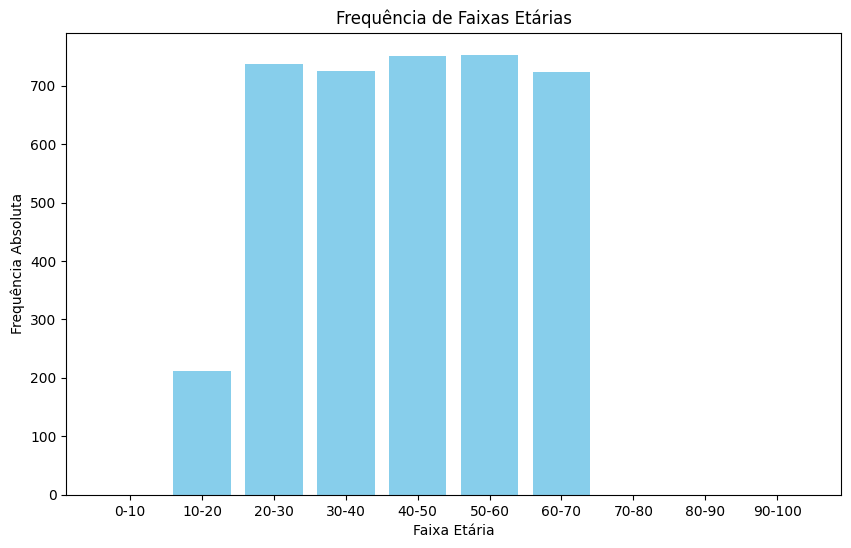

In [ ]:
faixas_etarias = frequencia_faixa_etaria['Faixa Etária']
frequencias = frequencia_faixa_etaria['Frequência']

#transformando a frequencia absoluta completamente em string para podermos visualizar o gráfico em barra

faixas_etarias_string = [f"{intervalo.left}-{intervalo.right}" for intervalo in faixas_etarias]

plt.figure(figsize=(10, 6))
plt.bar(faixas_etarias_string, frequencias, color='skyblue')

plt.xlabel('Faixa Etária')
plt.ylabel('Frequência Absoluta')
plt.title('Frequência de Faixas Etárias')

#tirando a rotação do rótulo no eixo x
plt.xticks(rotation=0)

plt.show()

In [ ]:
dados.columns

#agora eu tenho a visualização de idade em faixa etária e de forma absoluta

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases', 'Faixa Etária'],
      dtype='object')

In [ ]:
frequencia_genero = dados['Gender'].value_counts().reset_index()

frequencia_genero.columns = ['Gênero do Cliente', 'Frequência']

print(frequencia_genero)

#não posso incluir esse agrupamento no dataframe original, porque ele vai repetir o resultado várias vezes
#para fins analíticos, isso não faz sentido
#para uma matriz de correlação, não posso utilizar a frequencia_genero como dataframe separado. teria que estar contida no meu dataframe original


  Gênero do Cliente  Frequência
0              Male        2652
1            Female        1248


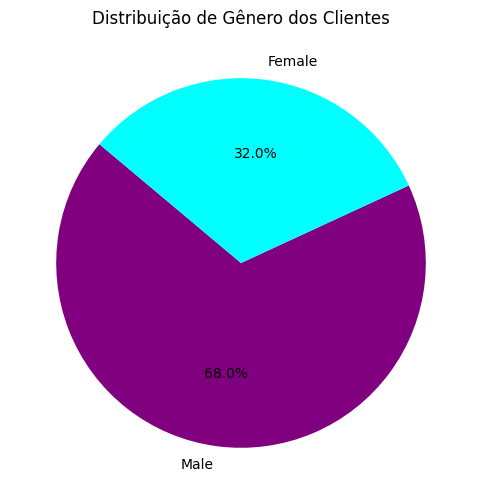

In [ ]:
cores = ['purple', 'cyan']

plt.figure(figsize=(6, 6))
plt.pie(frequencia_genero['Frequência'], labels=frequencia_genero['Gênero do Cliente'], autopct='%1.1f%%', startangle=140, colors=cores)

plt.title('Distribuição de Gênero dos Clientes')

plt.show()

In [ ]:
novos_dados = dados.copy
novos_dados = ['Location']

#colocando os dados pra o df usando pandas para poder usar o folium

import pandas as pd

dados_pandas = pd.DataFrame(novos_dados, columns=dados_spark.columns)



In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display
import math
import pandas as pd

# Coordenadas dos Estados Unidos (como não temos precisão em relação ao ponto de compra, irei utilizar uma coordenada generalista pra entender apenas a concentração de vendas pelo país (sul, norte, nordeste, oeste, etc.))
latitude_eua = -8.047562
longitude_eua = -34.877125

# Crie o objeto de mapa centrado no Recife
mapa_eua = folium.Map(location=[latitude_eua, longitude_eua], zoom_start=12)

coordenadas = [
    [37.8223, -85.7682],  # Kentucky
    [45.3676, -68.9724],  # Maine
    [42.4072, -71.3824],  # Massachusetts
    [41.5801, -71.4774],  # Rhode Island
    [43.8041, -120.5542],  # Oregon
    [43.0757, -107.2903],  # Wyoming
    [46.8797, -110.3626],  # Montana
    [30.9843, -91.9623],  # Louisiana
    [38.9202, -80.1817],  # West Virginia
    [37.9643, -91.8318],  # Missouri
    [34.7465, -92.2896],  # Arkansas
    [20.7961, -156.3319],  # Hawaii
    [38.9108, -75.5277],  # Delaware
    [43.1939, -71.5724],  # New Hampshire
    [42.1657, -74.9481],  # New York
    [32.8067, -86.7911],  # Alabama
    [32.7416, -89.6787],  # Mississippi
    [35.7596, -79.0193],  # North Carolina
    [36.7783, -119.4179],  # California
    [35.0078, -97.0929],  # Oklahoma
    [27.7663, -81.6868],  # Florida
    [31.9686, -99.9018],  # Texas
    [38.8026, -116.4194],  # Nevada
    [38.4982, -98.3201],  # Kansas
    [39.5501, -105.7821],  # Colorado
    [47.5289, -99.7840],  # North Dakota
    [40.6331, -89.3985],  # Illinois
    [39.7684, -86.1581],  # Indiana
    [34.0489, -111.0937],  # Arizona
    [64.2008, -149.4937],  # Alaska
    [35.7478, -86.6923],  # Tennessee
    [40.4173, -82.9071],  # Ohio
    [40.0583, -74.4057],  # New Jersey
    [39.0458, -76.6413],  # Maryland
    [44.0682, -72.6695],  # Vermont
    [34.9727, -105.0324],  # New Mexico
    [33.8569, -80.9450],  # South Carolina
    [44.0682, -114.7420],  # Idaho
    [40.7128, -77.7920],  # Pennsylvania
    [41.6032, -73.0877],  # Connecticut
    [39.3200, -111.0937],  # Utah
    [37.7693, -78.1699],  # Virginia
    [32.1656, -82.9001],  # Georgia
    [41.4925, -99.9018],  # Nebraska
    [42.0308, -93.6319],  # Iowa
    [43.9695, -99.9018],  # South Dakota
    [46.7296, -94.6859],  # Minnesota
    [47.7511, -120.7401],  # Washington
    [43.0731, -89.4012],  # Wisconsin
    [44.3148, -85.6024]  # Michigan
]

for coord in coordenadas:
    novas_coordenadas.append(coord)

    for j in range(1, 6):
        # raio
        raio = 0.0025 * math.sqrt(j)

        # Ângulo
        angulo = (15 * math.pi * j) / 6

        nova_latitude = coord[0] + raio * math.sin(angulo)
        nova_longitude = coord[1] + raio * math.cos(angulo)

        nova_coordenada = [nova_latitude, nova_longitude]
        novas_coordenadas.append(nova_coordenada)

HeatMap(novas_coordenadas).add_to(mapa_eua)
display(mapa_eua)

In [ ]:
contagem_compras = dados['Purchase Amount (USD)'].value_counts().reset_index()
contagem_compras.columns = ['Valor da Compra (USD)', 'Contagem']
print(contagem_compras)


    Valor da Compra (USD)  Contagem
0                      94        62
1                      32        62
2                      36        62
3                      51        61
4                      90        60
..                    ...       ...
76                    100        36
77                     87        35
78                     49        35
79                     69        34
80                     61        33

[81 rows x 2 columns]


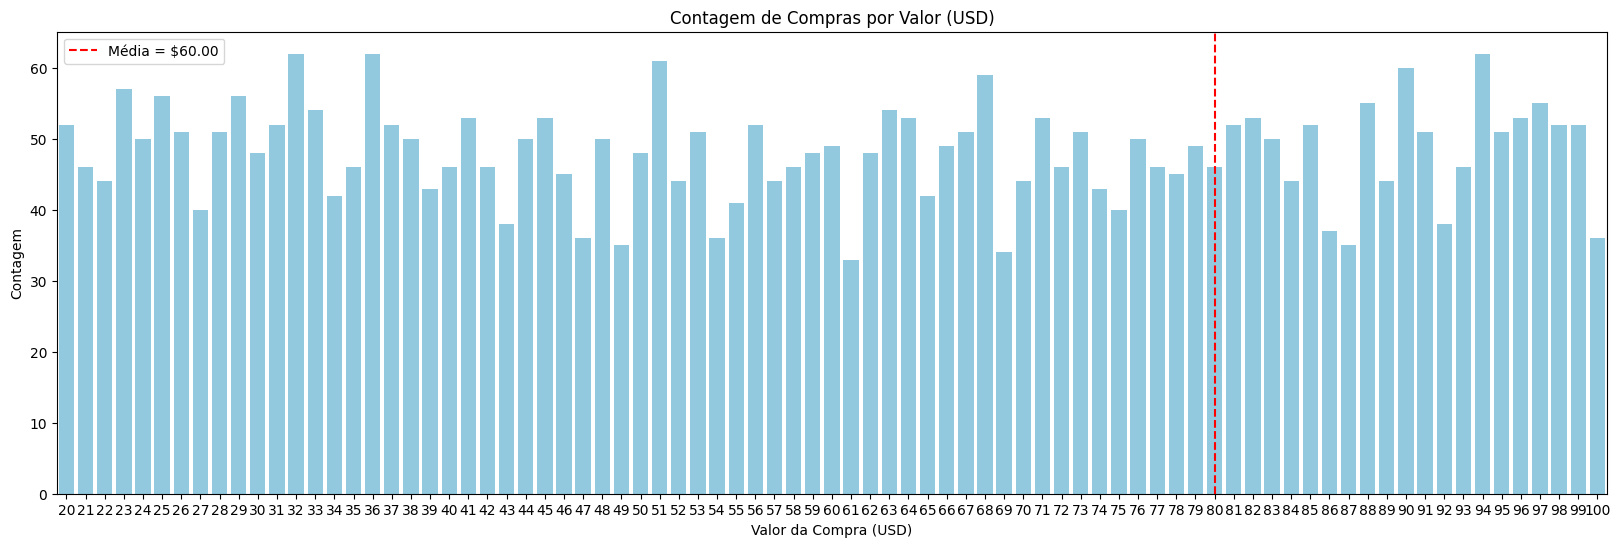

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

media = contagem_compras['Valor da Compra (USD)'].mean()

plt.figure(figsize=(20, 6))
sns.barplot(x='Valor da Compra (USD)', y='Contagem', data=contagem_compras, color='skyblue')

#fazendo uma linha pra entender a tendência de gastos dos meus clientes (em dólares)
plt.axvline(x=media, color='red', linestyle='--', label=f'Média = ${media:.2f}')

plt.title('Contagem de Compras por Valor (USD)')
plt.xlabel('Valor da Compra (USD)')
plt.ylabel('Contagem')
plt.legend()

plt.show()


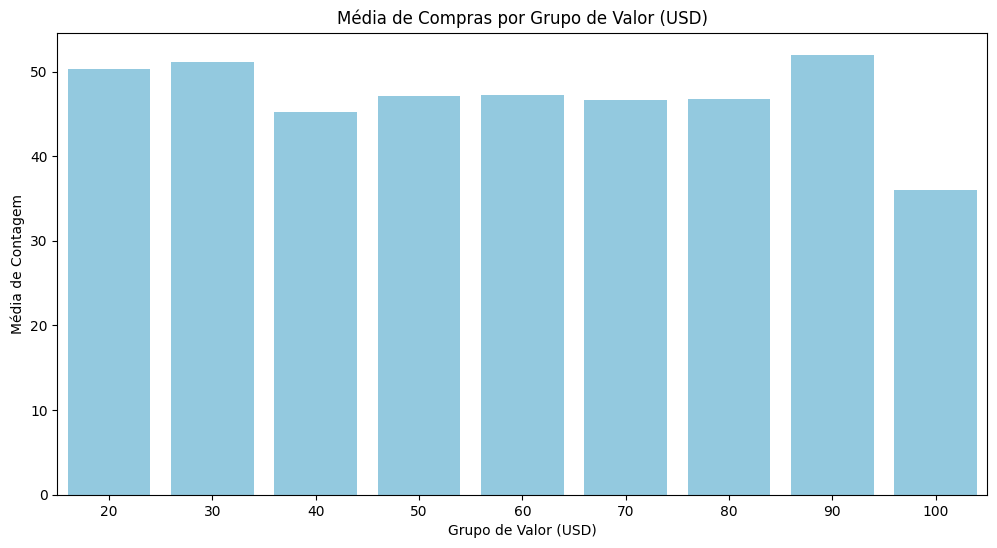

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

incremento = 10

contagem_compras['Grupo de Valor'] = (contagem_compras['Valor da Compra (USD)'] // incremento) * incremento

media_por_grupo = contagem_compras.groupby('Grupo de Valor')['Contagem'].mean().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Grupo de Valor', y='Contagem', data=media_por_grupo, color='skyblue')

plt.title('Média de Compras por Grupo de Valor (USD)')
plt.xlabel('Grupo de Valor (USD)')
plt.ylabel('Média de Contagem')

plt.show()
